## <font color=green> FACTS Data: <font color=black> **emulandice** </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
from datetime import date
import os

# <font color=black> **__________________________________________________________________________** </font>
### <font color=blue> List of **Modules** and **Data** to be used </font>

In [2]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('IP_emulandice_module_submodule_dataFILE.txt',comment = '#')
#
df.insert(0, 'Num', np.arange(df.shape[0]))
#
display(df)

,Num,Component,Module,subModule,DataFile
0,0,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_globalsl.nc
1,1,AIS,emulandice,AIS,emuAIS.emulandice.AIS_globalsl.nc
2,2,EAIS,emulandice,AIS,emuAIS.emulandice.AIS_EAIS_globalsl.nc
3,3,WAIS,emulandice,AIS,emuAIS.emulandice.AIS_WAIS_globalsl.nc
4,4,PEN,emulandice,AIS,emuAIS.emulandice.AIS_PEN_globalsl.nc


# <font color=black> **__________________________________________________________________________** </font>
### <font color=blue> Display structure of the **.nc** file </font>

In [3]:
EXPDATE   = 221217                    # Experiment date.
SCENARIO  = ['ssp245'];                           
NUM       = 1
#        
d_nc = xr.open_dataset('/projects/kopp/facts-experiments/{}/coupling.{}/output/coupling.{}.{}'.format(EXPDATE, SCENARIO[0], SCENARIO[0],df.at[NUM,"DataFile"]))
d_nc

<xarray.Dataset>
Dimensions:           (years: 9, samples: 2000, locations: 1)
Coordinates:
  * years             (years) int32 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * samples           (samples) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
  * locations         (locations) int64 -1
Data variables:
    lat               (locations) float32 ...
    lon               (locations) float32 ...
    sea_level_change  (samples, years, locations) int16 ...
Attributes:
    description:  Global SLR contribution from Antarctica using the emulandic...
    history:      Created Sat Dec 17 10:42:43 2022
    source:       FACTS: coupling.ssp245.emuAIS.emulandice.AIS. 
    baseyear:     2005
    scenario:     ssp245

# <font color=black> **__________________________________________________________________________** </font>
### <font color=blue>Extract **.nc** data \& Find Percentiles **(ALL YEARS)** </font>

In [4]:
import emu_ncTOdf as IP                       
#        
df_ptile, _ = IP.module_Fig_nc(df,SCENARIO,EXPDATE)
#display(df_ptile)

### <font color=blue> Percentiles for **(2100)** </font>

In [5]:
_ , df_ptile_100 = IP.module_Fig_nc(df,SCENARIO,EXPDATE,yrPTILE=2100)
display(df_ptile_100)

,,SSP,ssp245
,,,median(17-83)
Num,Component,Module,
0,GrIS,emulandice,7.70 (3.50 - 12.70)
1,AIS,emulandice,8.00 (2.70 - 13.90)
2,EAIS,emulandice,2.20 (-0.80 - 5.30)
3,WAIS,emulandice,4.70 (0.40 - 9.20)
4,PEN,emulandice,1.10 (0.10 - 2.00)


# <font color=black> **__________________________________________________________________________** </font>
## <font color=green> **Plot**: <font color=black> emulandice Components</font>

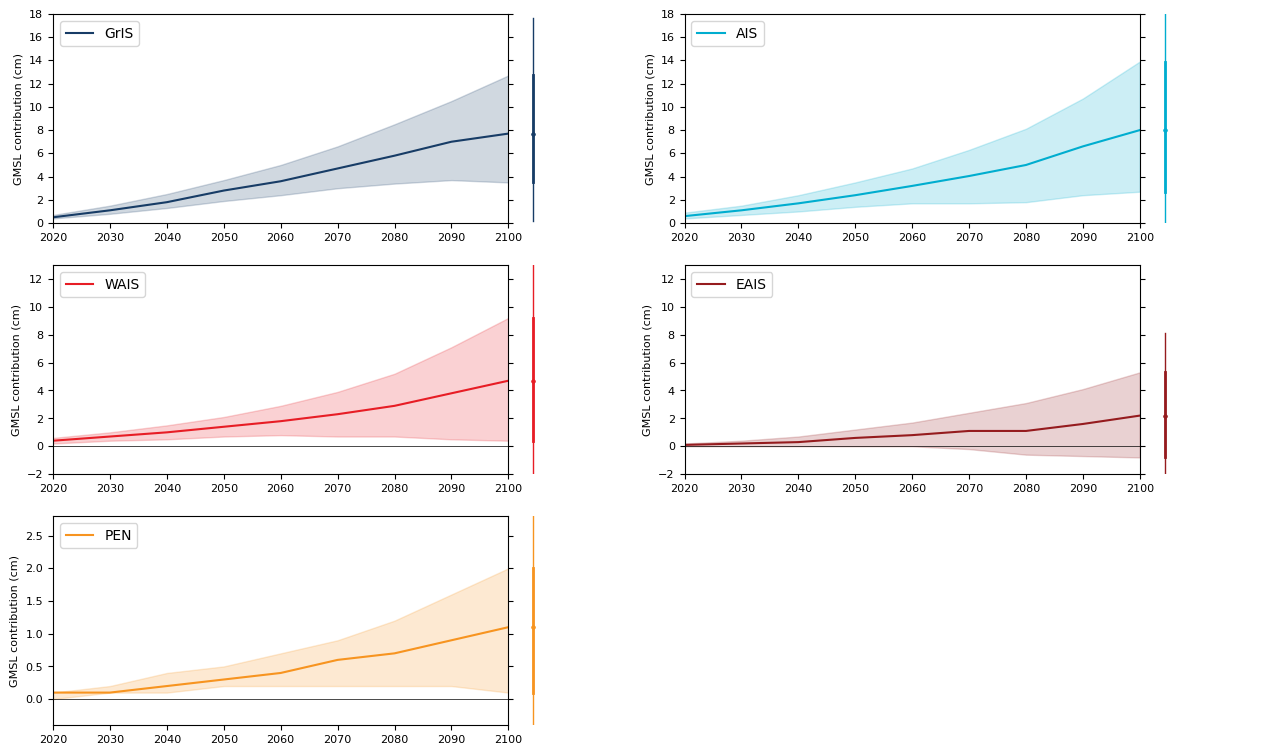

# <font color=black> **------------------------------------------------------------------------** </font>
## <font color=green> **re-Plot**: <font color=black> 1cm ==> 36Gt of fresh water</font>

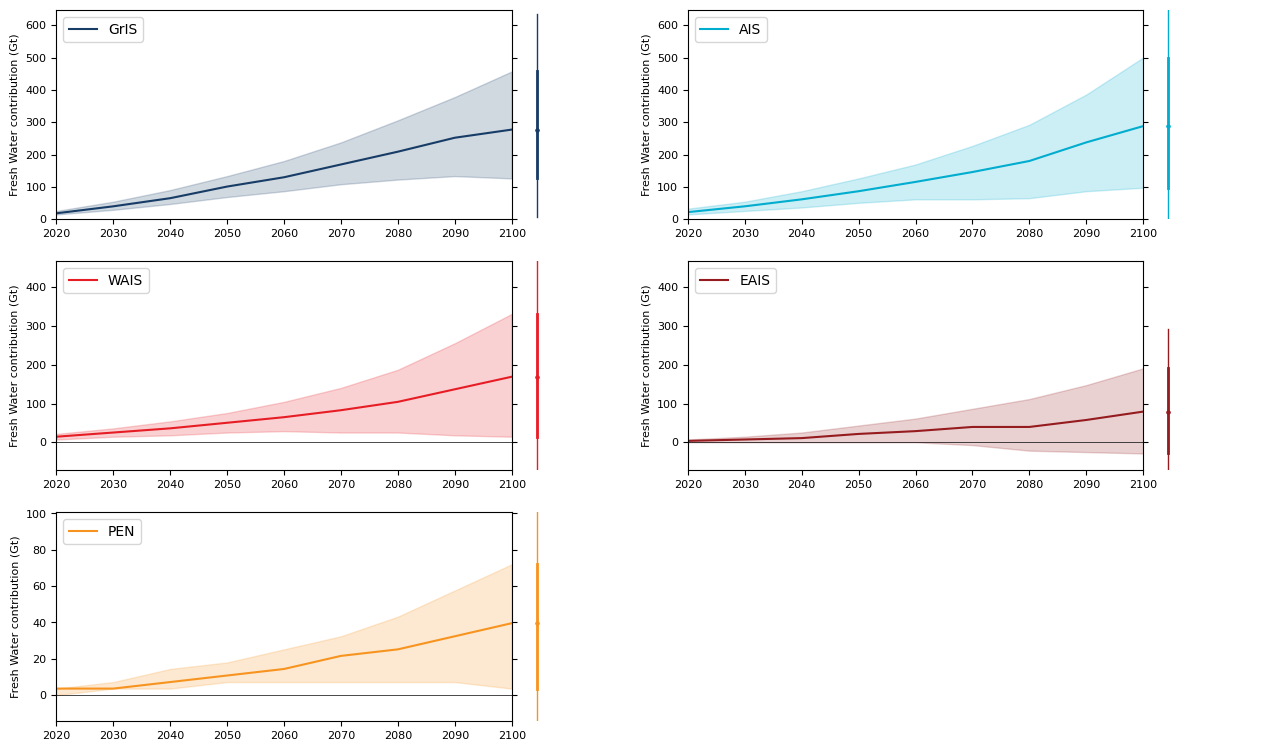